# Get Results Fast with fastai

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

![](../graphics/fastai-01.png)

## 1. The fastai Philosophy

- [fastai](https://www.fast.ai/) is a deep learning library and course created by Jemery Howard and Rachel Thomas. 
- I like to use this analogy: **keras is to Tensorflow as fastai is to PyTorch.**
- Unlike keras, fastai is **very opinionated** library. 
- Instead of creating a generic tools for deep learning experts to use, the fastai founders are creating courses and a library that make it **dramatically easier and faster** to get cutting-edge results quickly with deep learning. 
- One tool they use to accomplish this is by **encoding best practices from research directly into the library**. 
- This approach has led to some pretty dramatic results, including [training a model on imagenet in 18 minutes](https://www.fast.ai/2018/08/10/fastai-diu-imagenet/) and some breakthrough results in [pretraining models for natural language processing](https://arxiv.org/pdf/1801.06146.pdf). 
- Now, there are some trade-offs. In my experience, fastai can be buggy, difficult to debug, and challenging to generalize in some cases. 
- My thinking on these trade-offs, in late 2019, is this: 

1. For quickly exploring + testing top-performing models and new ideas on your own datasets, **it's hard to beat fastai**. In my experience, you'll be able to test lots of ideas quickly, and move fast. 
2. Having a reasonable good understanding of the underlying PyTorch code can make you much more effective with fastai, allowing you to "pick and choose" the parts of the fastai library you want to use, and what you want to implement yourself in PyTorch. 
3. I still really like Keras and Tensorflow, but I rarely use these libraries as **starting points** on new projects. 

---

## 2. Quick Computer Vision example with fastai

In [15]:
from fastai.vision import *

In [16]:
#Download our data if we don't have it:
path = untar_data(URLs.DOGS)

The fastai untar_data method downloads are data, and returns a Pathlib path to the location where our data is stored:

In [21]:
path.ls()

[PosixPath('/Users/stephenwelch/.fastai/data/dogscats/valid'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/.DS_Store'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/test1'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/models'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/sample'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train')]

In [22]:
path_train=path/'train'

In [23]:
path_train.ls()

[PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/dogs'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/cats'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/.DS_Store')]

Here, our data is "labeled" by the name of the folder that it's in. 

In [27]:
fnames = get_image_files(path/'train'/'dogs')
fnames[:5]

[PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/dogs/dog.8011.jpg'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/dogs/dog.7322.jpg'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/dogs/dog.1753.jpg'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/dogs/dog.3144.jpg'),
 PosixPath('/Users/stephenwelch/.fastai/data/dogscats/train/dogs/dog.775.jpg')]

When our data is organized in this way, we can use fastai's `ImageDataBunch.from_folder` to load our dataset.

In [28]:
bs=16 #Batch Size, decrease this if you run out of GPU memory (you may need to restart your kernel if this happens)
sz = 224 #Image Size

In [29]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, size = sz, bs=bs, ds_tfms = tfms)

In [30]:
data

ImageDataBunch;

Train: LabelList (23000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dogs,dogs,dogs,dogs,dogs
Path: /Users/stephenwelch/.fastai/data/dogscats;

Valid: LabelList (2000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dogs,dogs,dogs,dogs,dogs
Path: /Users/stephenwelch/.fastai/data/dogscats;

Test: None

Fastai includes pretty reasonable data augmentation be default:

In [31]:
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={'row_pct': 0.014961470066667149, 'col_pct': 0.08131646014353522, 'padding_mode': 'reflection'}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={'magnitude': tensor([ 0.1065,  0.1120, -0.0725,  0.1130]), 'invert': False}, do_run=False, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={'degrees': 2.8187168297607244}, do_run=False, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={'scale': 1.0113275207995238, 'row_pct': 0.056946714494953476, 'col_pct': 0.230651605364375

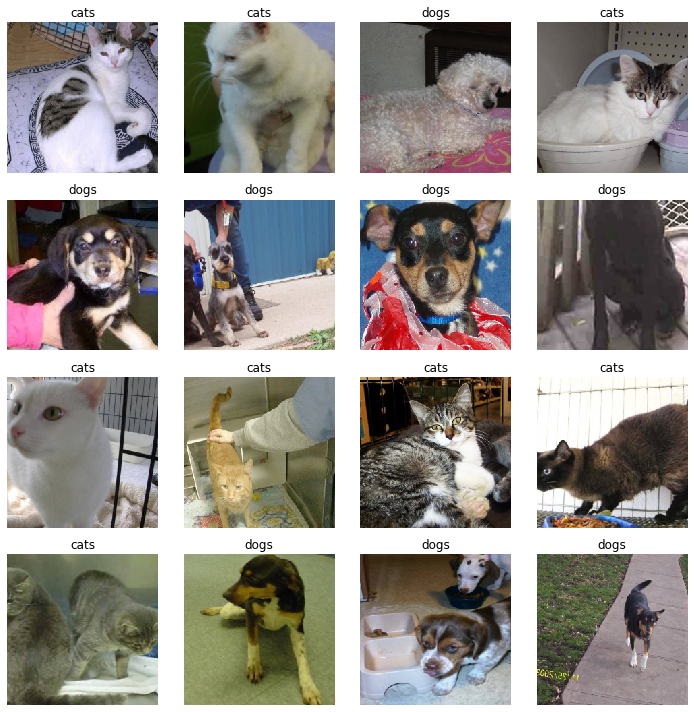

In [32]:
#fast ai has some nice built in visualization methods:
data.show_batch(rows = 5, figsize = (10, 10))

### ResNet

![](../graphics/imagenet_over_time-01.png)

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, pretrained=True)

- This is pretty slow on CPU, you can download my pretrained model [here](http://www.welchlabs.io/unccv/intro_to_computer_vision/dogs_vs_cats.pth), just put the pth in the data directory of this repo.

In [7]:
# Takes a couple hours to train on CPU, just a few minutes on GPU 
#learn.fit(epochs = 2, lr = 1e-2)

In [8]:
#learn.fit_one_cycle(cyc_len = 4, max_lr = 1e-2)

In [11]:
#If we don't want to take the time to train here , we can load saved model weights from data directory
learn.model_dir = Path(os.getcwd().split('fastai')[0])/'data'
learn.load('dogs_vs_cats');

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

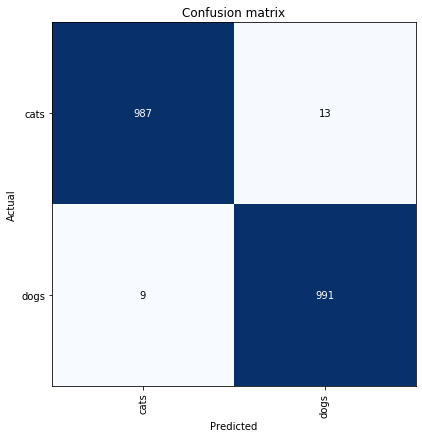

In [13]:
interp.plot_confusion_matrix(figsize = (6, 6))

## 3. Tabular/Columnar Data with fastai

## 4. Natural Langauge with fastai